### Setting up the environment:

In [3]:
#1# Importing libraries: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

RSEED=42

#2# Visualizing the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#3# Importing the original dataset with dummies:
df_fraud = pd.read_csv('./data/df_fraud_dummy.csv')

#### Preparing the data: 

In [4]:
#1# JUST FOR THE ELETRIC TYPE:

# ELEC= 0 and Gas =1:
column_to_check_gas = 'counter_type'
df_eletric = df_fraud[df_fraud[column_to_check_gas] == 0]
df_eletric["target"]

0          0
1          0
2          0
3          0
4          0
          ..
1048566    0
1048567    0
1048568    0
1048571    0
1048573    0
Name: target, Length: 721014, dtype: int64

In [5]:
#2# JUST FOR FRAUD IN GAS TYPE: 

# Fraud = 1 , Non-fraud = 0
column_to_check_fraud = 'target'
df_eletric_fraud = df_eletric[df_eletric[column_to_check_fraud] == 1]
df_eletric_fraud.head(20)

,ID,invoice_date,tarif_type,counter_number,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,...,counter_statue_2,counter_statue_3,counter_statue_4,counter_statue_5,reading_remarque_7,reading_remarque_8,reading_remarque_9,client_catg_12,client_catg_51,sum_consu
1384,100032,2017-02-24,11,393848.000,1,781,0,0,0,8,...,0,0,0,0,0,0,1,0,0,781
1385,100032,2016-06-21,11,393848.000,1,382,0,0,0,4,...,0,0,0,0,0,0,1,0,0,382
1386,100032,2018-10-26,11,393848.000,1,373,0,0,0,4,...,0,0,0,0,0,0,1,0,0,373
1387,100032,2018-06-21,11,393848.000,1,328,0,0,0,4,...,0,0,0,0,0,0,1,0,0,328
1388,100032,2018-02-23,11,393848.000,1,703,0,0,0,4,...,0,0,0,0,0,0,1,0,0,703
1389,100032,2017-10-26,11,393848.000,1,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1390,100032,2017-06-21,11,393848.000,1,376,0,0,0,4,...,0,0,0,0,0,0,1,0,0,376
1391,100032,2014-04-11,11,393848.000,1,418,0,0,0,4,...,0,0,0,0,0,0,1,0,0,418
1392,100032,2013-04-03,11,393848.000,1,303,0,0,0,4,...,0,0,0,0,0,0,1,0,0,303
1393,100032,2013-10-30,11,393848.000,1,403,0,0,0,4,...,0,0,0,0,0,0,1,0,0,403


In [6]:
#1# Preparing the data:
# The data is too big for the machine to handle. 
# Therefore, We'll keep only the most important features,according to what was discussed within the group.

df_eletric.drop(['invoice_date', 'consommation_level_1',
       'consommation_level_2', 'consommation_level_3', 'consommation_level_4',
       "client_catg_12", "client_catg_51",
       'creation_date','counter_statue_1', 'counter_statue_2', 'counter_statue_3',
       'counter_statue_4', 'counter_statue_5', 'reading_remarque_7',
       'reading_remarque_8', 'reading_remarque_9','counter_number'],axis=1,inplace=True)

df_eletric.columns

Index(['ID', 'tarif_type', 'counter_coefficient', 'months_number',
       'counter_type', 'region', 'target', 'sum_consu'],
      dtype='object')

In [7]:
df_fraud_clients_eletric = df_eletric.groupby(["ID"]).value_counts().reset_index()
print(f"Eletric Clients: {df_eletric['ID'].nunique()}\nFraudulent clients:{df_eletric_fraud['ID'].nunique()}")

Eletric Clients: 31449
Fraudulent clients:1756


In [8]:
#2# Splitting the data:

y = df_fraud_clients_eletric['target']
X = df_fraud_clients_eletric.drop('target', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X,y, stratify=None, test_size=0.3, random_state=RSEED)

In [9]:
#3# Scaling the data for a better performance:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [10]:
#4# Dealing with the imbalance: 
#Create synthetic samples for the minority class.

smote = SMOTE(random_state=RSEED)
X_train_smt, y_train_smt = smote.fit_resample(X_train_norm, y_train)


#### Logistc Regression analysis: 

In [11]:
#1# Training the model:
lr_mod = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
lr_mod.fit(X_train_smt, y_train_smt)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [12]:
#2# Making a prediction:

#A# Train Data:
y_pred_train_lr = lr_mod.predict(X_train_smt)
classif_train_lr = classification_report(y_train_smt, y_pred_train_lr)

#B# Test Data:
y_pred_test_lr = lr_mod.predict(X_test)	
classif_test_lr = classification_report(y_test, y_pred_test_lr)

In [13]:
#3#Printing evaluation: 
print("LOGISTIC REGRESSION ANALYSIS: \n")
print(f"Test Classification: \n {classif_test_lr}")

print(f"Train Classification: \n {classif_train_lr}")

LOGISTIC REGRESSION ANALYSIS: 

Test Classification: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    185378
           1       0.09      0.00      0.00     15236

    accuracy                           0.92    200614
   macro avg       0.51      0.50      0.48    200614
weighted avg       0.86      0.92      0.89    200614

Train Classification: 
               precision    recall  f1-score   support

           0       0.52      0.47      0.49    433165
           1       0.51      0.56      0.53    433165

    accuracy                           0.51    866330
   macro avg       0.51      0.51      0.51    866330
weighted avg       0.51      0.51      0.51    866330



#### Random Forest analysis:

In [14]:
#1# Training the module:
rf_mod = RandomForestClassifier(n_estimators=100, random_state=RSEED, min_weight_fraction_leaf=0.3, max_features=4)
rf_mod.fit(X_train_smt, y_train_smt)

RandomForestClassifier(max_features=4, min_weight_fraction_leaf=0.3,
                       random_state=42)

In [15]:
#2# Checking the Hyperparameters: 

params = rf_mod.get_params()

for param, value in params.items():
    print(f"{param}: {value}")


bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: 4
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.3
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [16]:
#3# Making a prediction:

#A# Train Data:
y_pred_train_rf = rf_mod.predict(X_train_smt)
classif_train_rf = classification_report(y_train_smt, y_pred_train_rf)

#B# Test Data:
y_pred_test_rf = rf_mod.predict(X_test)
classif_test_rf = classification_report(y_test, y_pred_test_rf)

In [17]:
#3#Printing evaluation:
print("RANDOM FOREST ANALYSIS: \n")
 
print(f"Train Classification: \n {classif_train_rf}")

print(f"Test Classification: \n {classif_test_rf}")

RANDOM FOREST ANALYSIS: 

Train Classification: 
               precision    recall  f1-score   support

           0       0.53      0.66      0.59    433165
           1       0.55      0.42      0.48    433165

    accuracy                           0.54    866330
   macro avg       0.54      0.54      0.53    866330
weighted avg       0.54      0.54      0.53    866330

Test Classification: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    185378
           1       0.08      1.00      0.14     15236

    accuracy                           0.08    200614
   macro avg       0.04      0.50      0.07    200614
weighted avg       0.01      0.08      0.01    200614



#### KNN analysis: 

In [18]:
#1# Training module:

knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric="euclidean")
knn.fit(X_train_smt, y_train_smt)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [19]:
y_pred_knn_train = knn.predict(X_train_smt)

In [20]:
y_pred_knn_test = knn.predict(X_test_norm)

KNN ANALYSIS: 

Train data:
Accuracy: 1.0
Recall: [1. 1.]
--------------------------------------------------
Test data:
Accuracy: 0.96
Recall: [0.97 0.92]
--------------------------------------------------


Text(95.72222222222221, 0.5, 'Original data')

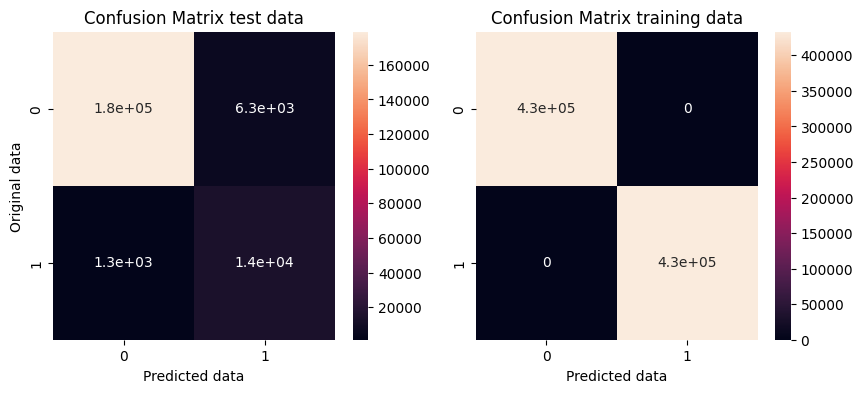

In [21]:
print("KNN ANALYSIS: \n")
# Print accuracy score for training data
print("Train data:")
print("Accuracy:", accuracy_score(y_train_smt, y_pred_knn_train).round(2))
print("Recall:", recall_score(y_train_smt, y_pred_knn_train, average=None).round(2))
print("-----"*10)

# Print accuracy score for test data
print("Test data:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_test).round(2))
print("Recall:", recall_score(y_test, y_pred_knn_test, average=None).round(2))
print("-----"*10)

# Print confusion matrix:
matrix_name = y.unique()
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax1,ax2 = ax
ax1.set_title('Confusion Matrix test data')
ax2.set_title('Confusion Matrix training data')
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), xticklabels= matrix_name, yticklabels= matrix_name, annot=True, ax=ax1);
sns.heatmap(confusion_matrix(y_train_smt, y_pred_knn_train), xticklabels= matrix_name, yticklabels= matrix_name, annot=True, ax=ax2);
ax1.set_xlabel('Predicted data')
ax2.set_xlabel('Predicted data')
ax1.set_ylabel('Original data')

#### Decision Tree:

In [22]:
#1# Training the module: 

dt_mod = DecisionTreeClassifier(random_state=RSEED,min_weight_fraction_leaf=0.3)
dt_mod.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(min_weight_fraction_leaf=0.3, random_state=42)

In [23]:
y_pred_dt_test = dt_mod.predict(X_test_norm)
y_pred_dt_train = dt_mod.predict(X_train_smt)

In [24]:
print("DECISION TREE ANALYSIS \n")
print(f"Train data: \n {classification_report(y_train_smt, y_pred_dt_train)}")

print(f"Test data: \n {classification_report(y_test, y_pred_dt_test)}")

DECISION TREE ANALYSIS 

Train data: 
               precision    recall  f1-score   support

           0       0.52      0.73      0.61    433165
           1       0.56      0.34      0.42    433165

    accuracy                           0.53    866330
   macro avg       0.54      0.53      0.52    866330
weighted avg       0.54      0.53      0.52    866330

Test data: 
               precision    recall  f1-score   support

           0       0.93      0.73      0.82    185378
           1       0.09      0.34      0.14     15236

    accuracy                           0.70    200614
   macro avg       0.51      0.53      0.48    200614
weighted avg       0.87      0.70      0.77    200614



In [25]:
export_graphviz(dt_mod, out_file='./images/tree.pdf', feature_names=X.columns, class_names=['class_0', 'class_1'], filled=True, rounded=True)

#### Ensamble Method - Voting:

In [26]:
ensamble_met = ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_mod),
    ('logistic_regression', lr_mod),
    ('knn', knn),
    ("decision_tree", dt_mod)
], voting='hard') 

In [27]:
ensemble_classifier.fit(X_train_smt, y_train_smt)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(max_features=4,
                                                     min_weight_fraction_leaf=0.3,
                                                     random_state=42)),
                             ('logistic_regression',
                              LogisticRegression(C=0.001, penalty='l1',
                                                 solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=3,
                                                   weights='distance')),
                             ('decision_tree',
                              DecisionTreeClassifier(min_weight_fraction_leaf=0.3,
                                                     random_state=42))])

In [28]:
ensamble_pred_y_test = ensamble_met.predict(X_test_norm)
ensamble_pred_y_train = ensamble_met.predict(X_train_smt)

In [31]:
print("VOTING ENSAMBLE \n")
print(f"Train data: \n {classification_report(y_train_smt, ensamble_pred_y_train)}")

print(f"Test data: \n {classification_report(y_test, ensamble_pred_y_test)}")

VOTING ENSAMBLE 

Train data: 
               precision    recall  f1-score   support

           0       0.52      0.73      0.61    433165
           1       0.56      0.34      0.42    433165

    accuracy                           0.53    866330
   macro avg       0.54      0.53      0.52    866330
weighted avg       0.54      0.53      0.52    866330

Test data: 
               precision    recall  f1-score   support

           0       0.93      0.73      0.82    185378
           1       0.09      0.34      0.15     15236

    accuracy                           0.70    200614
   macro avg       0.51      0.53      0.48    200614
weighted avg       0.87      0.70      0.77    200614

